<a href="https://colab.research.google.com/github/rudzbart/175IC-machine-learning/blob/main/zad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.961236604722876
0.7219280948873623
0.2863969571159562
Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca ['setosa' 'versicolor' 'virginica']


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


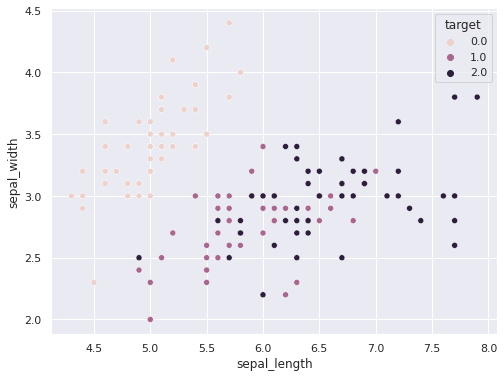

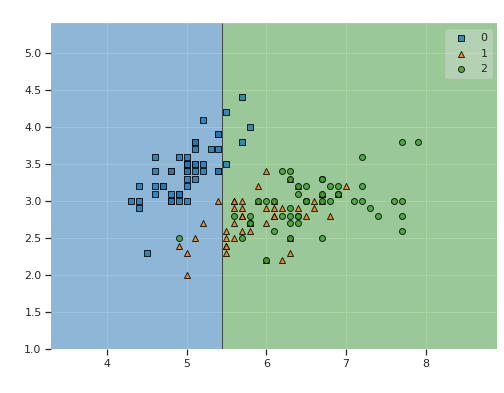

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


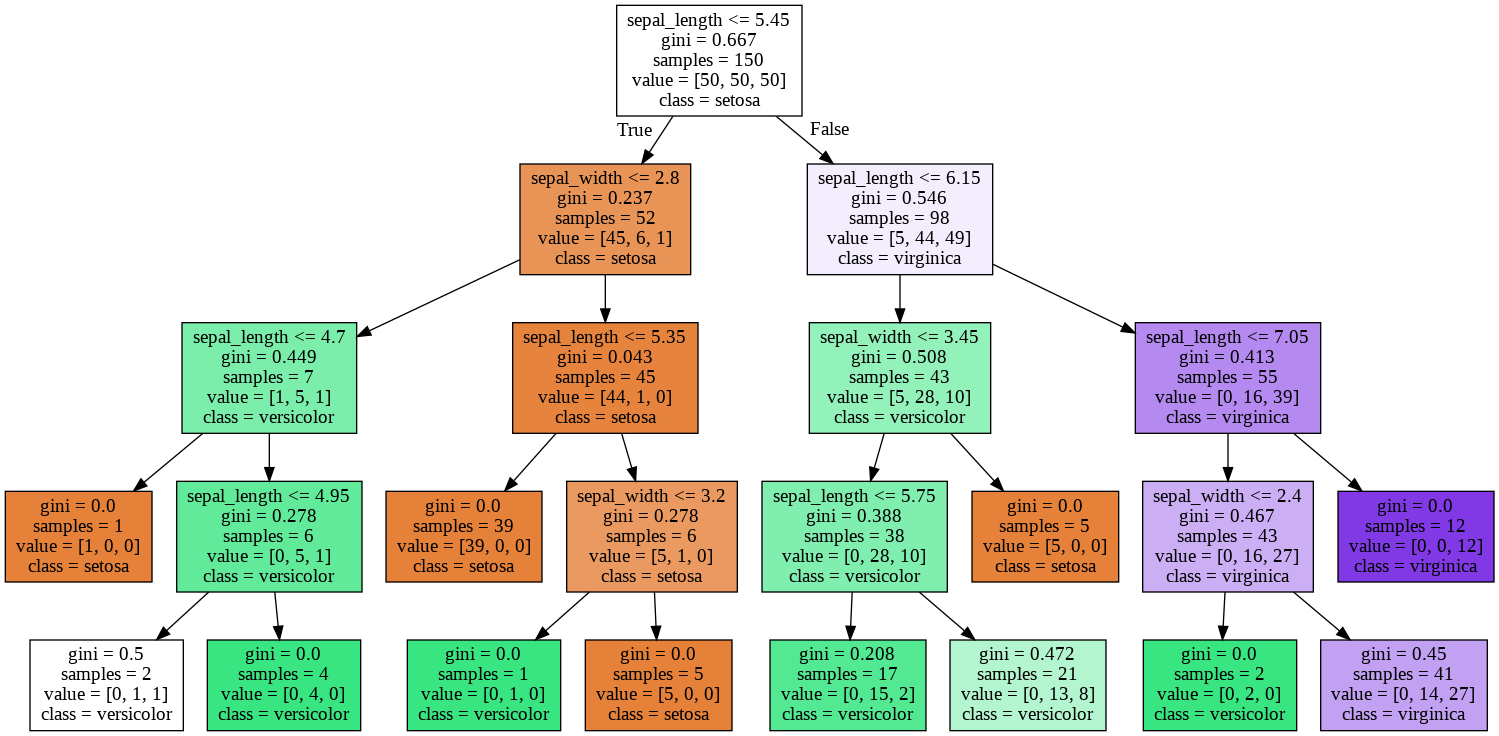

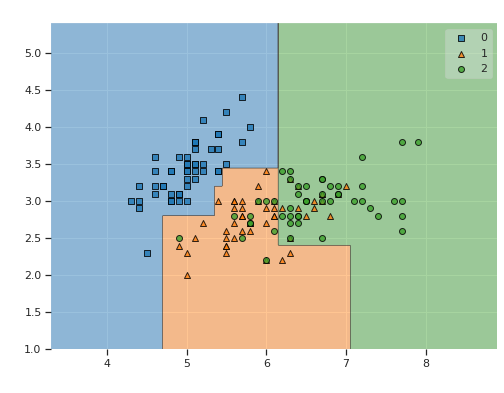

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

print(entropy([0.5,0.8],base=2))
print(entropy([0.8,0.2],base=2))
print(entropy([0.95,0.05],base=2))

sns.set()
np.random.seed(42)

raw_data=load_iris()
all_data=raw_data.copy()

data=all_data['data']
target=all_data['target']
feature_names=[name.replace(' ','_')[:-5] for name in all_data['feature_names']]
target_names=all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca {target_names}')

df=pd.DataFrame(data=np.c_[data,target], columns=feature_names+['target'])
df.head()

plt.figure(figsize=(8,6))
sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df)

data= df.copy()
data=data[['sepal_length','sepal_width','target']]
target=data.pop('target')

classifier=DecisionTreeClassifier(max_depth=1)
classifier.fit(data,target)

acc=classifier.score(data,target)
plt.figure(figsize=(8,6))
plot_decision_regions(data.to_numpy(), target.to_numpy().astype(np.integer), classifier)

plt.xlabel('sepal length (cm)',color='White')
plt.ylabel('sepal length (cm)',color='White')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc*100:.2f}%',color='White')
plt.show()

dot_data=StringIO()
export_graphviz(classifier,out_file=dot_data,feature_names=feature_names[:2],class_names=target_names,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),width=300)

def make_decision_tree(max_depth):
  classifier=DecisionTreeClassifier(max_depth=max_depth)
  classifier.fit(data,target)
  dot_data=StringIO()
  export_graphviz(classifier,out_file=dot_data,
                  feature_names=feature_names[:2],
                  class_names=target_names,filled=True)
  graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

  acc=classifier.score(data,target)
  
  plt.figure(figsize=(8,6))

  ax = plot_decision_regions(data.to_numpy(), target.to_numpy().astype(np.integer), classifier)

  plt.xlabel('sepal length (cm)',color='White')
  plt.ylabel('sepal length (cm)',color='White')
  plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc*100:.2f}%',color='White')

  return Image(graph.create_png(),width=200*max_depth*120)

#Przeuczenie występuje dla głębokości większej niż 3
make_decision_tree(4)